In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder='train'
classes=['Open_Eyes','Closed_Eyes']

train_data = []

for i in classes:
    path = os.path.join(folder,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        rgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])

In [3]:
print(len(train_data))

4000


In [4]:
import random

random.shuffle(train_data)

In [5]:
x = []
y = []

for i,j in train_data:
    x.append(i)
    y.append(j)
    

x = np.array(x).reshape(-1,224,224,3)

In [6]:

x.shape

(4000, 224, 224, 3)

In [7]:
x = x/255.0

In [8]:
y = np.array(y)

In [9]:
import pickle 
pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out) # This is used to serialize an object hierarchy
pickle_out.close

pickle_out = open('y.pickle', 'wb')
pickle.dump(y,pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [10]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
model = tf.keras.applications.mobilenet.MobileNet()

In [13]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [14]:
base_input = model.layers[0].input

In [15]:
base_output = model.layers[-4].output

In [16]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_op = layers.Activation('sigmoid')(final_output)

In [17]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [18]:
new_model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [19]:
new_model.fit(x,y,epochs=8, validation_split= 0.1)

Epoch 1/8
113/113 [==============================] - 400s 3s/step - loss: 1.3936 - accuracy: 0.9050 - val_loss: 7.3959 - val_accuracy: 0.5150
Epoch 2/8
113/113 [==============================] - 465s 4s/step - loss: 0.9846 - accuracy: 0.9339 - val_loss: 0.3856 - val_accuracy: 0.9750
Epoch 3/8
113/113 [==============================] - 436s 4s/step - loss: 0.0995 - accuracy: 0.9928 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/8
113/113 [==============================] - 425s 4s/step - loss: 0.0300 - accuracy: 0.9978 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/8
113/113 [==============================] - 421s 4s/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/8
113/113 [==============================] - 686s 6s/step - loss: 4.7660 - accuracy: 0.6856 - val_loss: 4.7654 - val_accuracy: 0.6875
Epoch 7/8
113/113 [==============================] - 316s 3s/step - loss: 4.5952 - accuracy: 0.7014 - val_loss: 5.3329 - val_accuracy: 0

In [20]:
new_model.save('my_model.h5')

In [21]:
new_model = tf.keras.models.load_model('my_model.h5')

In [22]:
img = cv2.imread('closed_test_1.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb , (224,224))

In [23]:
x_input = np.array(new).reshape(1,224,224,3)

In [24]:
x_input.shape

(1, 224, 224, 3)

In [25]:
x_input = x_input/255.0

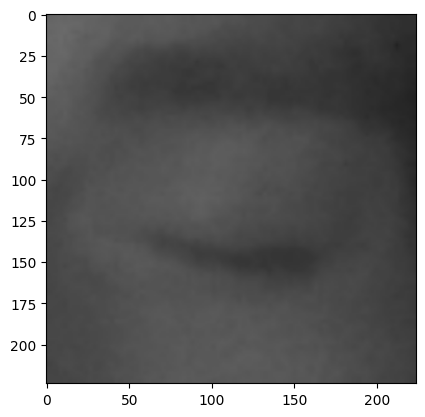

In [26]:
plt.imshow(new)

In [27]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 0s 459ms/step


In [28]:
prediction

array([[-18.580723]], dtype=float32)

In [29]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [30]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [31]:
img = cv2.imread('Screenshot 2023-07-03 230941.png')

In [32]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

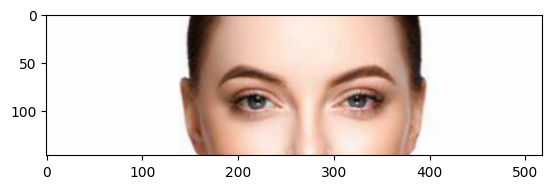

In [33]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [34]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [35]:
for x,y,w,h in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),2)

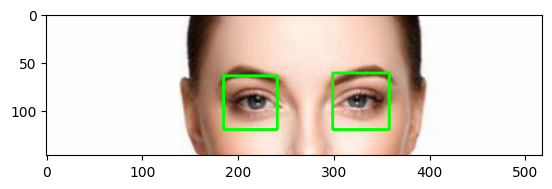

In [36]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [37]:
# Cropping the eye 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print('eyes are not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
            

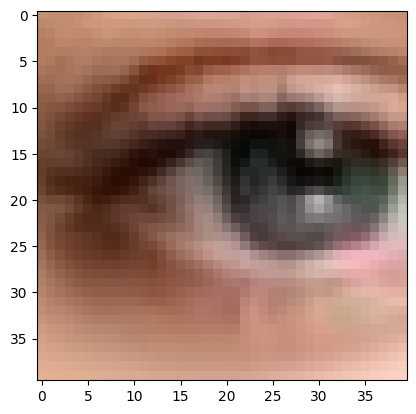

In [38]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [39]:
eyes_roi.shape

(40, 40, 3)

In [40]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [41]:
final_image.shape

(1, 224, 224, 3)

In [42]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 61ms/step


In [43]:
if predictions <0:
    print(predictions[0][0])

-2.719595


In [46]:
import cv2
import numpy as np
import winsound

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('Cannot open webcam')

counter = 0
status = "Unknown"
prev_status = "Unknown"
frequency = 440  # Frequency of 440 Hz (A4 note)
duration = 1000  # Duration of 1000 ms (1 second)

while True:
    cbs = 0  


    success, frame = cap.read()
    if not success:
        break

    else:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        faces = face_cascade.detectMultiScale(frame, 1.1, 7)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Draw rectangle around each face with transparent filling
        for (x, y, w, h) in faces:
            overlay = frame.copy()
            cv2.rectangle(overlay, (x, y), (x+w, y+h), (192, 192, 192), -1)
            alpha = 0.5  # Transparency factor
            cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)

            if len(eyes) == 0:
                print('Eyes not detected')
                cbs = 0
                break

            for (ex, ey, ew, eh) in eyes:
                cbs = 1
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    if cbs == 1:
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image/255.0

        # Make predictions using the model
        predictions = new_model.predict(final_image)
        if predictions[0][0] < 0.3:
            status = "Open Eyes"
            x1, y1, w1, h1 = 0, 0, 130, 50
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
            cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/3)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            if counter > 1:
                x1, y1, w1, h1 = 0, 0, 130, 50
                cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
                cv2.putText(frame, 'Sleep Alert!!', (x1+int(w1/10), y1+int(h1/3)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                winsound.Beep(frequency, duration)
                counter = 0

    else:
        # If eyes are not detected, use the previous status
        status = prev_status

    # Update the previous status
    prev_status = status

    cv2.putText(frame, status, (250, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)
    cv2.imshow('Driver Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 41ms/step
Eyes not detected
1/1 [==============================] - 0s 50ms/step
Eyes not detected
1/1 [==============================] - 0s 40ms/step
